<a href="https://colab.research.google.com/github/Uluc/data_science_and_analytics/blob/main/decision_tree_and_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Implement the function to calculate gini index given the fraction of two classes

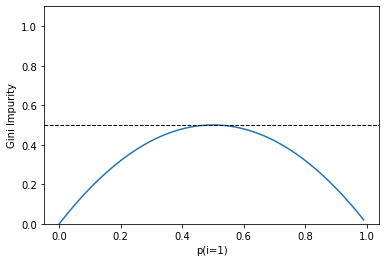

In [ ]:
import numpy as np

def gini(p1, p2):
  return 1 - (p1*p1 + p2*p2)
    
   
x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, gini(x, 1-x))
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Gini Impurity')
plt.show()

-----------------------------------------------------------------------

## Decision Tree

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(np.unique(y))

(120, 4) (120,) (30, 4) (30,)
[0 1 2]


In [ ]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int or float, default=2
 |      The minimum 

Task 1
---
Build a decision tree model using the training data (X_train, y_train). Use the model to make prediction on the testing data (X_test). Calculate the *accuracy* of the prediction comparing to the treu class label (y_test). 

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
p = tree.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,p))

print(np.sum(y_test == p)/len(p))

0.9666666666666667
0.9666666666666667


Task 2
---
Using GridSearchCV, do a search to find the values for 'min_samples_leaf' (1, 5, 10) and 'max_depth' (2, 3, 4) that give the best prediction accuracy. Print the grid scores and the best values. 

In [ ]:
from sklearn.model_selection import GridSearchCV

help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_search_params = {'min_samples_leaf':[1,5,10], 'max_depth':[2,3,4]}
tree_search = GridSearchCV(tree_clf, tree_search_params, cv=5, verbose=0)
tree_search.fit(X,y)

print('Best score: ',tree_search.best_score_)
print('Best parameters: ',tree_search.best_params_)

import pandas as pd
score = pd.DataFrame(tree_search.cv_results_)
score[score.columns[6:13]]

Best score:  0.9733333333333334
Best parameters:  {'max_depth': 3, 'min_samples_leaf': 1}


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 1}",0.933333,0.966667,0.900000,0.866667,1.0,0.933333
1,"{'max_depth': 2, 'min_samples_leaf': 5}",0.933333,0.966667,0.900000,0.866667,1.0,0.933333
2,"{'max_depth': 2, 'min_samples_leaf': 10}",0.933333,0.966667,0.900000,0.866667,1.0,0.933333
3,"{'max_depth': 3, 'min_samples_leaf': 1}",0.966667,0.966667,0.933333,1.000000,1.0,0.973333
4,"{'max_depth': 3, 'min_samples_leaf': 5}",0.966667,1.000000,0.866667,0.866667,1.0,0.940000
5,"{'max_depth': 3, 'min_samples_leaf': 10}",0.933333,0.966667,0.900000,0.866667,1.0,0.933333
6,"{'max_depth': 4, 'min_samples_leaf': 1}",0.966667,0.966667,0.900000,0.933333,1.0,0.953333
7,"{'max_depth': 4, 'min_samples_leaf': 5}",0.966667,1.000000,0.866667,0.866667,1.0,0.940000
8,"{'max_depth': 4, 'min_samples_leaf': 10}",0.933333,0.966667,0.900000,0.866667,1.0,0.933333


-----------------------------------------------------------------------